# Homework 3

## Question 1

*1. We have seen that as the number of features used in a model increase, the training error will
necessarily decrease, but the test error may not. Let’s examine this in simulation.*

### (a) *Generate a data set with p = 25 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model: Y = Xβ + ε, where β has some elements that are exactly equal to zero. (be sure to use “set.seed”)*

In [2]:
install.packages('tidyverse')
library(tidyverse)
install.packages('corrplot')
library(corrplot)
install.packages('leaps')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('ggthemes')
library(leaps)
library(ggplot2)
library(dplyr)
library(ggthemes)



The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


corrplot 0.92 loaded




The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


installing and loading the libraries

In [206]:
set.seed(201)

p=25
n=1000

X = matrix(rnorm(n*p), n, p)

beta <- rnorm(25)
beta[1]=beta[6]=beta[9]=beta[16]=beta[19]=beta[3]=beta[23]=0

Created datatset with 25 features and 1000 observations with normal distribution.Defined a (p × 1) vector beta with normal distribution with mean 0 and s.d 1. And assign few values to zero as mentioned.

In [207]:
epsilon <- rnorm(1000)

defined another (n × 1) vector epsilon for the model.

In [208]:
y <- X%*%beta + epsilon

created the dataset model with Y=βX+ϵ

### (b) *Split your data set into a training set containing 500 observations and a test set containing 500 observations.*

In [209]:
train = sample(seq(n), 500, replace=FALSE)
test = (-train)

x.train = X[train,]
x.test = X[test,]
y.train = y[train]
y.test = y[test]


converted the matrix into dataframe. Splitted the dataset into train and test by 500 each adn the response varibale for each.

### (c) *Perform subset selection (best, forward or backwards) on the training set, and plot the training and test MSE associated with the best model of each size.*

# Training MSE

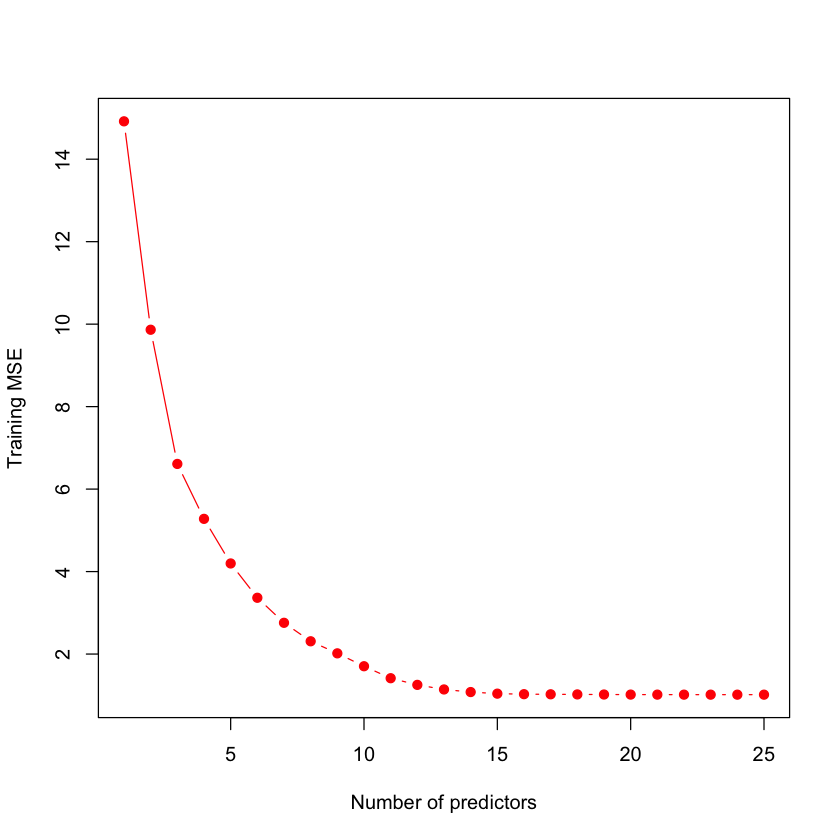

In [225]:
data.train = data.frame(y = y.train, x = x.train)
regfit.model = regsubsets(y ~ ., data = data.train, nvmax = p )#method='backward')
train.matrix = model.matrix(y ~ ., data = data.train, nvmax = p)
val.errors = rep(NA, p)

for (i in 1:p) {
        coefi = coef(regfit.model, id = i)
        pred = train.matrix[, names(coefi)] %*% coefi
        val.errors[i] = mean((pred - y.train)^2)
}

plot(val.errors, xlab = "Number of predictors",
ylab = "Training MSE", pch = 19, type = "b",col="red")


In [226]:
which.min(val.errors)

[1] 25

The training MSE decreases with the addition of any new variable, even after 20 variables. Here the model selected 25 predictors for the model with least MSE.

# Test MSE

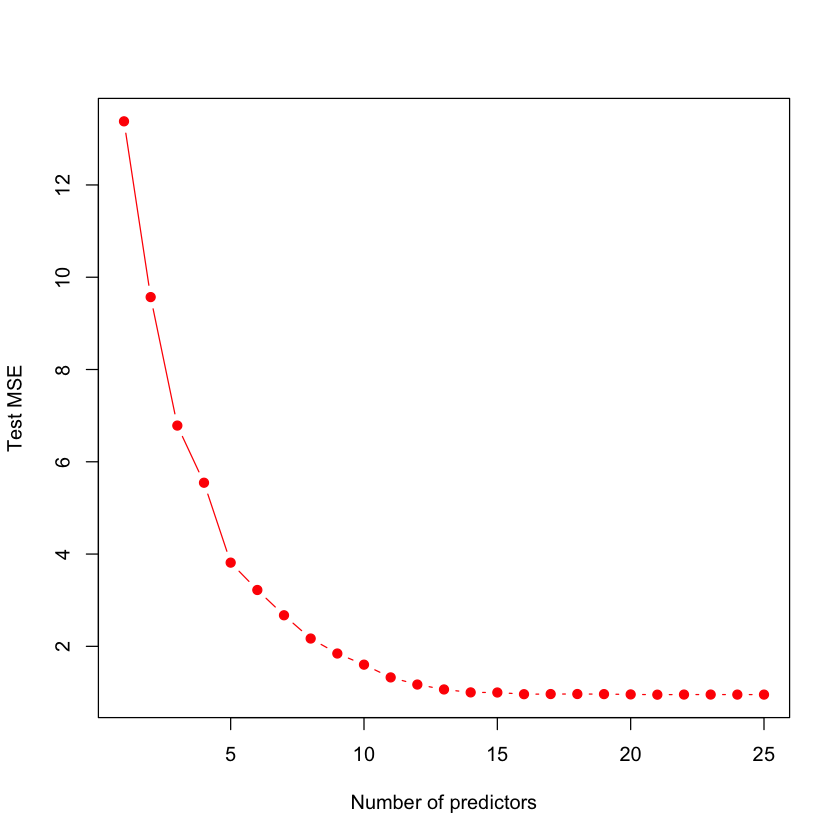

In [229]:
data.test = data.frame(y = y.test, x = x.test)
test.matix = model.matrix(y ~ ., data = data.test, nvmax = p)
val.errors = rep(NA, p)

for (i in 1:p) {
        coefi = coef(regfit.model, id = i)
        pred = test.matix[, names(coefi)] %*% coefi
        val.errors[i] = mean((pred - y.test)^2)
}

plot(val.errors, xlab = "Number of predictors",
ylab = "Test MSE", pch = 19, type = "b",col="red")


In [230]:
which.min(val.errors)

[1] 21

Here we can see the test MSE is the least at 21 predicators which is using almost all predictors. But the values of the test error is slighlty reduced.

### (d) *For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept a model containing all the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size*

As we can see above for both the test aand training MSE is minimised for model with 20 predictors. So we will generate data so that we can get test set MSE minimized for an intermediate model size.


In [286]:
set.seed(300)

train = sample(seq(n), 900, replace=FALSE)
test = (-train)

x.train = X[train,]
x.test = X[test,]
y.train = y[train]
y.test = y[test]

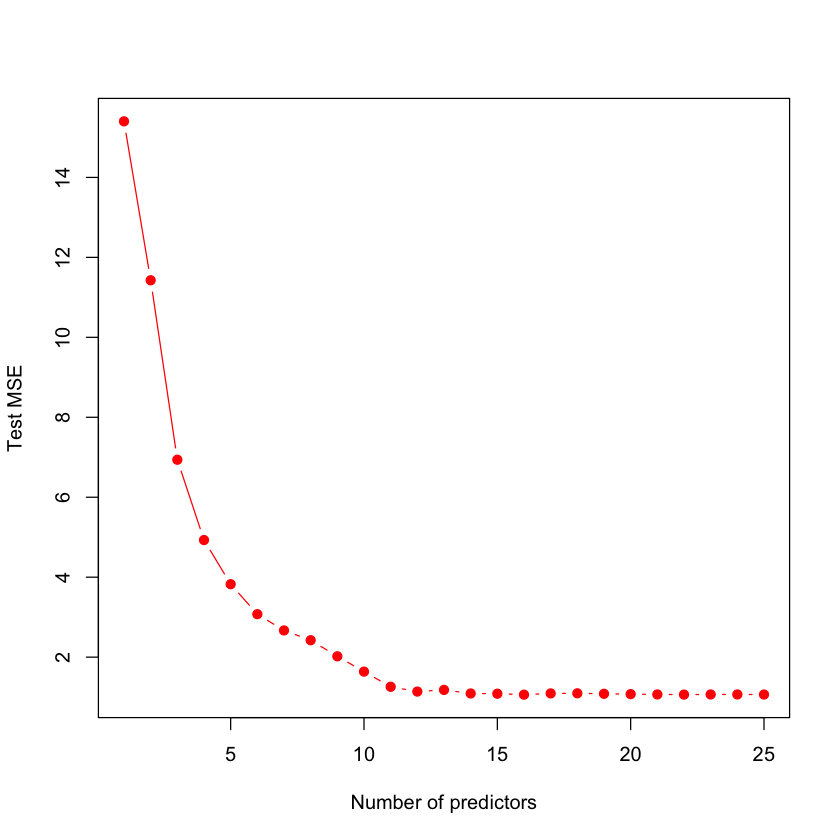

In [287]:
data.train = data.frame(y = y.train, x = x.train)
regfit.inter.model = regsubsets(y ~ ., data = data.train, nvmax = p)

data.test = data.frame(y = y.test, x = x.test)
test.matix = model.matrix(y ~ ., data = data.test, nvmax = p)
val.errors = rep(NA, 25)

for (i in 1:p) {
        coefi = coef(regfit.model, id = i)
        pred = test.matix[, names(coefi)] %*% coefi
        val.errors[i] = mean((y.test-pred )^2)
}

plot(val.errors, xlab = "Number of predictors",
ylab = "Test MSE", pch = 19, type = "b",col="red")

In [288]:
which.min(val.errors) 

[1] 16

So here when we split the dataset in 3:4 ratio, the test MSE got minimized to generate model with 16 predictors.

### (e) *How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.*

In [289]:
(coef(regfit.inter.model, which.min(val.errors) ))

(Intercept)          x.2          x.4          x.5          x.7          x.8 
 0.004114635 -0.253076755  0.540708116 -1.089271513  0.174275065 -0.883093203 
        x.10         x.11         x.12         x.13         x.14         x.15 
-0.419843674  0.706641896  2.274130602 -0.151759917 -1.214323783  0.784565296 
        x.17         x.18         x.21         x.24         x.25 
-0.331673170  2.357506689 -1.716560707 -0.558039216 -0.535777756

In the true model, we assigned 5 parameters zero. More specifically, we put the variables β1 = β3 = β6 = β9 = β16 = β19 = β23 = 0, so here and the best subset model find thosse variables and removed it from the model. For this model, the test MSE is minimal with 16 variables (ie, the no.of predictors - predictors with beta0).

### (f) *Create a plot containing 􏰁􏰀pi=1(βj −βˆjr)2 for a range of values r, where βˆjr is the jth coefficient estimate for the best model containing r coefficient. Comment on what you observe. How do these results compare to part D.*

In [290]:

val.errors = rep(NA, p)
x_cols = colnames(X, do.NULL = FALSE, prefix = "x.")
for (i in 1:p) {
        coefi = coef(regfit.inter.model, id = i)
        val.errors[i] = sqrt(sum((beta[x_cols %in% names(coefi)] - coefi[names(coefi) %in% x_cols])^2)
+ sum(beta[!(x_cols %in% names(coefi))])^2)
}
which.min(val.errors)

[1] 16

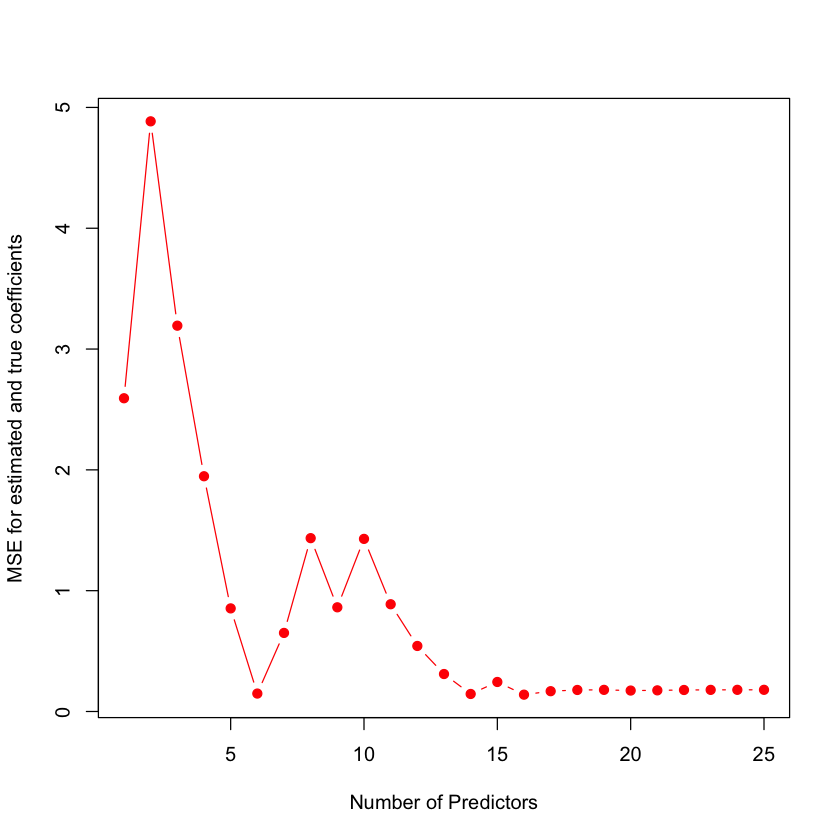

In [291]:
plot(val.errors, xlab = "Number of Predictors",
ylab = "MSE for estimated and true coefficients",
pch = 19, type = "b", col="red")

In [292]:
coef(regfit.model,which.min(val.errors))

(Intercept)         x.2         x.4         x.5         x.7         x.8 
 0.01029844 -0.24791132  0.52408678 -1.08985909  0.15848876 -0.87649656 
       x.10        x.11        x.12        x.13        x.14        x.15 
-0.42332073  0.69289103  2.27849284 -0.15036125 -1.20661824  0.78205082 
       x.17        x.18        x.21        x.24        x.25 
-0.30684955  2.35453172 -1.72494868 -0.56262126 -0.56256964

Here also the error is minimized for 16 variables. The model that provides parameter estimates (part d) and this true parameter estimate provides the least test MSE. But when we chnage the seed value above we will see that the model that provides parameter estimates that are closest to the true parameter estimate are not the same model that provides the least test MSE as in (part d).

## Question 2

*Consider the Diabetes dataset (posted with assignment). Assume the population prior proba- bilities are estimated using the relative frequencies of the classes in the data.*

### (a) *Produce pairwise scatterplots for all five variables, with different symbols or colors rep- resenting the three different classes. Do you see any evidence that the classes may have difference covariance matrices? That they may not be multivariate normal?*

In [293]:
install.packages('klaR')
install.packages('ggplot2')
install.packages('GGally')
library(GGally)
library(ggplot2)
library(klaR)



The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [294]:
setwd("/Users/sreeragvenugopalan/Desktop/Sem 1/Statistical Data Mining/HW/3")
data =  load('Diabetes.RData')

In [295]:
head(Diabetes,5)

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,0.81,80,356,124,55,Normal
2,0.95,97,289,117,76,Normal
3,0.94,105,319,143,105,Normal
4,1.04,90,356,199,108,Normal
5,1.00,90,323,240,143,Normal


In [299]:
summary(Diabetes$group)

Normal Chemical_Diabetic    Overt_Diabetic 
               76                36                33

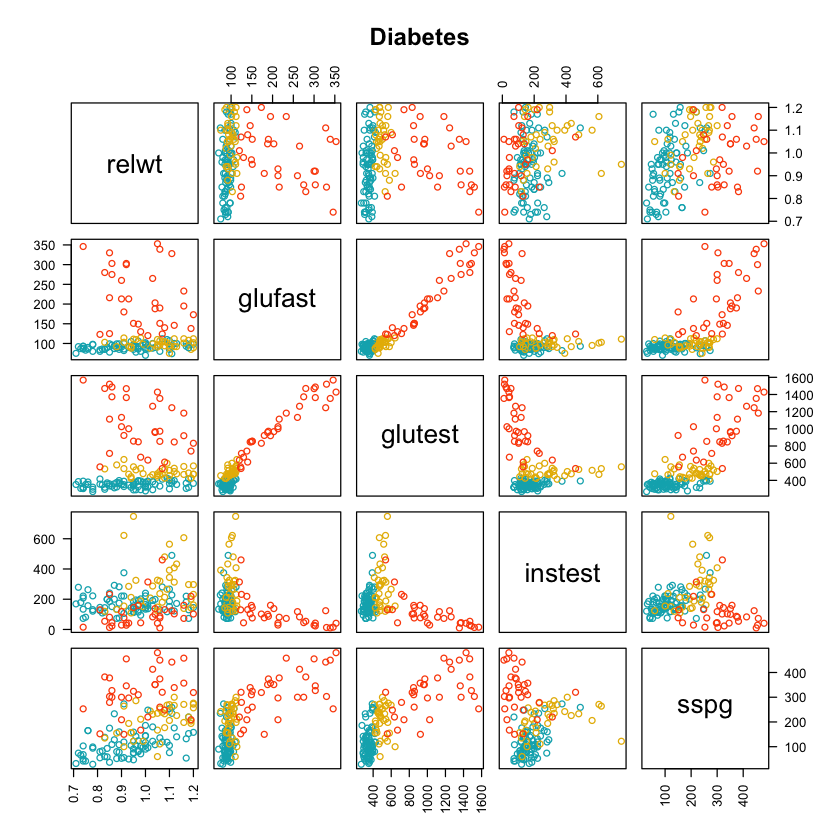

In [300]:
my_cols <- c("#00AFBB", "#E7B800", "#FC4E07") 
pairs(Diabetes[c('relwt','glufast','glutest','instest','sspg')],col = my_cols[Diabetes$group] ,las=2, main='Diabetes')

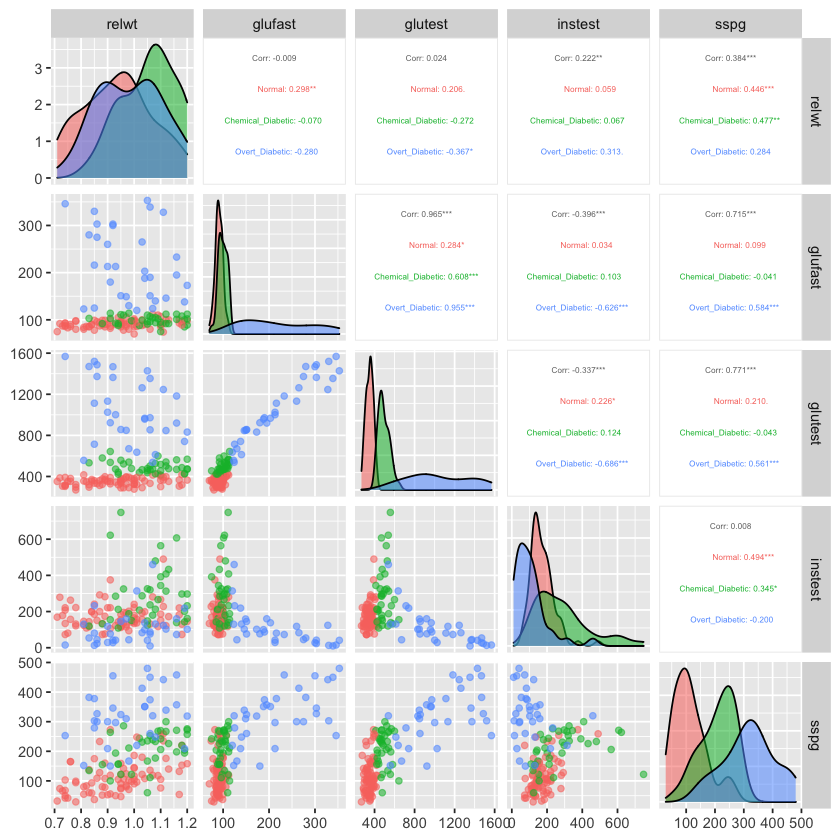

In [302]:
ggpairs(Diabetes, columns = 1:5, aes(color = group, alpha = 0.5),
        upper = list(continuous = wrap("cor", size = 1.75)))

Yes, from the above plot it is clear that the classes have different covariance matrices. The *Normal* group shows tha smallest variance and the *Over DIbatetic* shows tha largest covariance. There seems to be a direct development from normal to chemical to overt, in the glufast - glutest , sspg - glufast and sspg - glutest. However, for others, we can observe that the group with chemical diabetes differs from the controls in one way, whereas the group with overt diabetes differs in a different direction and has an intragroup correlation with the opposite sign to the others.

### (b) *Apply linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA). How does the performance of QDA compare to that of LDA in this case?*


## LDA Analysis

In [304]:
# Create a test and training set
set.seed(2255)
indis <- sample(1:nrow(Diabetes), round(2/3*nrow(Diabetes)), replace = FALSE)

train.data <- Diabetes[indis, ]
test.data <- Diabetes[-indis, ]
dim(train.data)
dim(test.data)

[1] 97  6

[1] 48  6

Call:
lda(group ~ ., data = train.data)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.5773196         0.1855670         0.2371134 

Group means:
                      relwt   glufast   glutest   instest     sspg
Normal            0.9457143  90.94643  349.2679 171.30357 112.4643
Chemical_Diabetic 1.0450000 101.44444  506.8889 262.72222 197.6667
Overt_Diabetic    0.9695652 203.82609 1002.7826  99.43478 308.9130

Coefficients of linear discriminants:
                 LD1          LD2
relwt    0.743436274 -4.046036046
glufast -0.037139505  0.046139316
glutest  0.012922477 -0.009713514
instest -0.000825485 -0.007125650
sspg     0.003630909  0.004464830

Proportion of trace:
   LD1    LD2 
0.9009 0.0991 

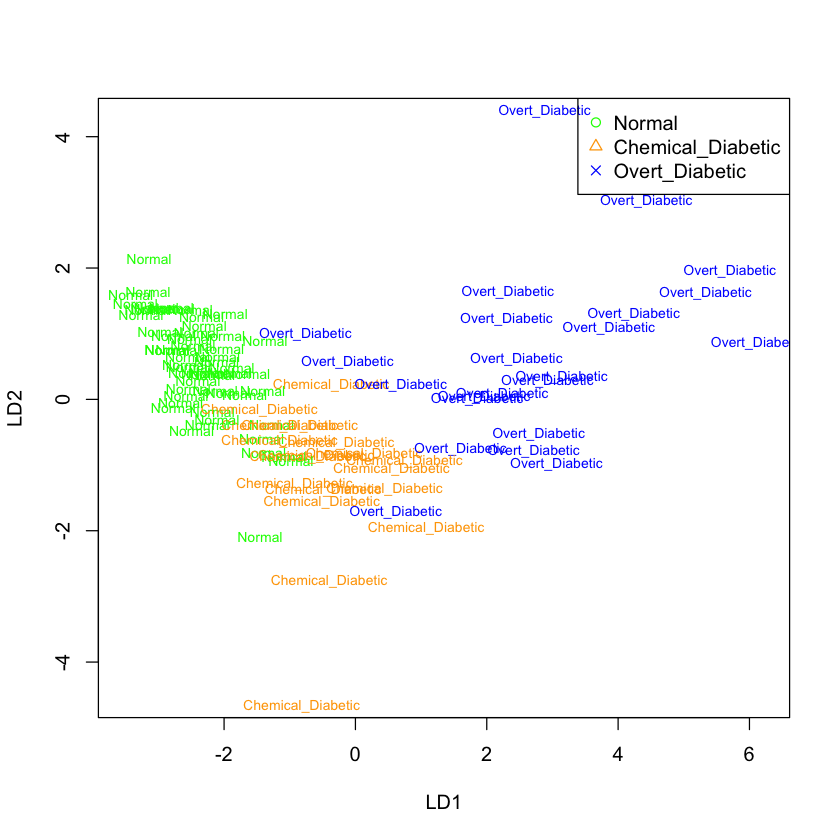

In [305]:
lda.fit <- lda(group~., data = train.data)
lda.fit

symbol <- c(1,2,4)[train.data$group]
color <-  c('green','orange','blue')[train.data$group]
plot(lda.fit, col=color, pch = symbol)
legend(x='topright', legend=c('Normal','Chemical_Diabetic','Overt_Diabetic'), col=c('green','orange','blue'), pch=c(1,2,4))

In [324]:
# make predictions for the training.
lda_train_pred <- predict(lda.fit, newdata = train.data)
head(data.frame(lda_train_pred$class, lda_train_pred$posterior, lda_train_pred$x),5)


,lda_train_pred.class,Normal,Chemical_Diabetic,Overt_Diabetic,LD1,LD2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,Normal,9.862200e-01,1.377866e-02,1.319578e-06,-1.5362588,0.1610726
45,Normal,9.998612e-01,1.387751e-04,2.652104e-08,-2.3664683,1.8994532
117,Overt_Diabetic,2.060416e-08,1.521519e-05,9.999848e-01,4.6339013,0.8504590
67,Normal,7.108025e-01,2.890426e-01,1.548966e-04,-0.5025489,-0.6243021
145,Overt_Diabetic,8.629813e-10,6.968141e-08,9.999999e-01,5.2043331,2.7861743


In [323]:
# make predictions for the test
lda_test_pred <- predict(lda.fit, newdata = test.data)
head(data.frame(lda_test_pred$class, lda_test_pred$posterior, lda_test_pred$x),5)


,lda_test_pred.class,Normal,Chemical_Diabetic,Overt_Diabetic,LD1,LD2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Normal,0.9997449,2.551165e-04,1.392365e-08,-2.479569,1.41669307
6,Normal,0.9849702,1.499372e-02,3.610714e-05,-0.900246,0.83422535
9,Normal,0.9841154,1.588191e-02,2.723117e-06,-1.394524,0.23833774
10,Normal,0.9999244,7.559219e-05,7.129466e-09,-2.628654,1.95474981
25,Normal,0.9796169,2.038168e-02,1.381927e-06,-1.519330,-0.05129366


In [325]:
# compute the train error rates
train_error <- (1/length(train.data$group))*length(which(train.data$group != lda_train_pred$class))
train_error

[1] 0.1237113

In [333]:
# compute the test error rates
test_error <- (1/length(test.data$group))*length(which(test.data$group != lda_test_pred$class))
test_error

[1] 0.125

## QDA Analysis

In [327]:
qda.fit <- qda(group~., data = train.data)
qda.fit

Call:
qda(group ~ ., data = train.data)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.5773196         0.1855670         0.2371134 

Group means:
                      relwt   glufast   glutest   instest     sspg
Normal            0.9457143  90.94643  349.2679 171.30357 112.4643
Chemical_Diabetic 1.0450000 101.44444  506.8889 262.72222 197.6667
Overt_Diabetic    0.9695652 203.82609 1002.7826  99.43478 308.9130

In [328]:
qda_train_pred <- predict(qda.fit, newdata = train.data)
qda_test_pred <- predict(qda.fit, newdata = test.data)

In [329]:
y_hat_train <- qda_train_pred$class
y_hat_test <- qda_test_pred$class

y_true_train <- train.data$group
y_true_test <- test.data$group

In [334]:
train_err <- (1/length(y_hat_train))*length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test))*length(which(y_true_test != y_hat_test))


train_err
test_err

[1] 0.04123711

[1] 0.04166667

From the error rate it is clear that QDA performed the best with an Accuracy of almost 95% where as LDA of 87% without 

### (c) *Suppose an individual has (glucose test/intolerence= 68, insulin test=122, SSPG = 544. Relative weight = 1.86, fasting plasma glucose = 184). To which class does LDA assign this individual? To which class does QDA?*

### LDA Prediction

In [335]:
X.data = data.frame(1.86,184,68,122,544,NA)
colnames(X.data) = c('relwt','glufast','glutest','instest','sspg')
X.data.lda_pred = predict(lda.fit, newdata = X.data)
X.data.lda_pred$class

[1] Normal
Levels: Normal Chemical_Diabetic Overt_Diabetic

LDA model predicted this data as Normal.

### QDA Prediction

In [336]:
X.data = data.frame(1.86,184,68,122,544,NA)
colnames(X.data) = c('relwt','glufast','glutest','instest','sspg')
X.data.qda_pred = predict(qda.fit, newdata = X.data)
X.data.qda_pred$class

[1] Overt_Diabetic
Levels: Normal Chemical_Diabetic Overt_Diabetic

QDA model predicted this data as Over Diabetic.

### (d) *Apply RDA (regularized discriminant analysis). What is the optimal value of α in this case? Does this support your observations about the covariance matrices in (a)*

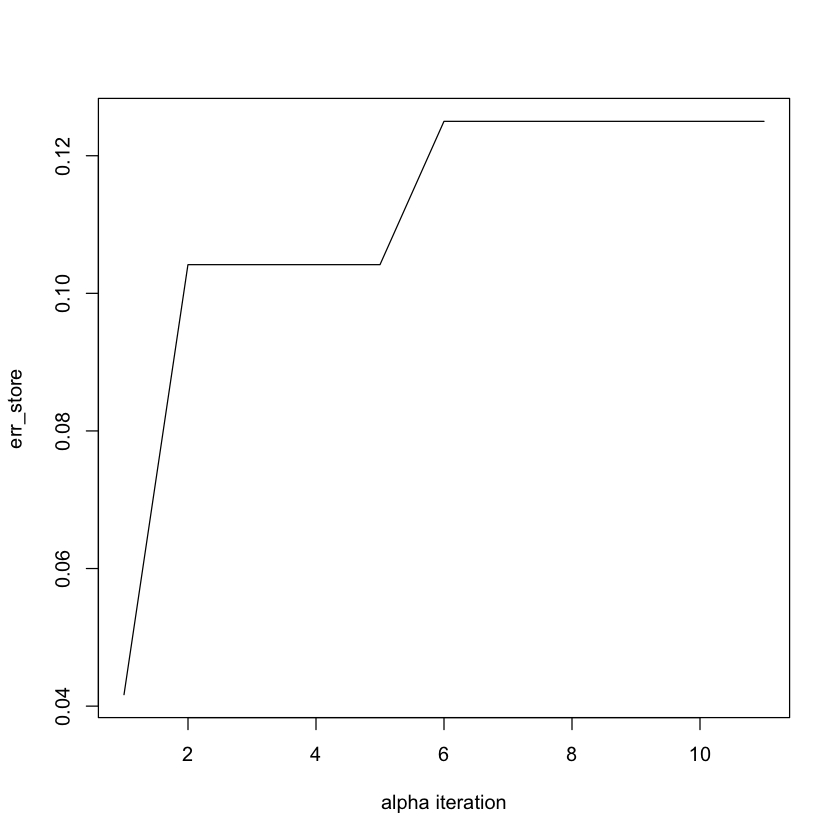

In [337]:
#rda_fit <- rda(group~., data = train.data, regularization = c(gamma=0, lambda=.5))

#rda_fit$error.rate
    
alpha = seq(from = 0, to = 1, by = .1)

err_store <- c()

for (i in 1:length(alpha)){
    rda_fit <- rda(group~., data = train.data, regularization = c(gamma=0, lambda=alpha[i]))
    
    y_hat_test <- predict(rda_fit, newdata=test.data)$class
    
    err <- (1/length(y_hat_test))*length(which(y_hat_test != test.data$group))
    
    err_store <- c(err_store,err)
}

plot(err_store, type = "l", xlab = "alpha iteration")

In [338]:
err_store

[1] 0.04166667 0.10416667 0.10416667 0.10416667 0.10416667 0.12500000
 [7] 0.12500000 0.12500000 0.12500000 0.12500000 0.12500000

for this data set we can see that QDA dis the best here with least error rate than the LDA.The errror rate is the same for both from halfway of alpha iteration with last one before dropping. So the simlplistic QDA is the best in this case. We cannot ignore the quadratic terms, hence the QDA covariance matrix may differ for each class. QDA typically fits the data better since it gives the covariance matrix more flexibility. However, there will be more parameters to estimate at that point. With QDA, there are a lot more parameters. Because each class will have its own covariance matrix with QDA,

# Question 3

*This problem concerns the Boston data set (ISLR2 package).*

### (a) *Fit classification models in order to predict whether a given census tract has a high or low crime rates. Explore logistic regression, LDA, QDA and KNN models using various subsets of the predictors. Describe your findings.*

In [339]:
library(MASS)
library(caret)
install.packages('ISLR2')
install.packages('MMST')
install.packages('caret')
install.packages("corrplot")
library(corrplot)


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift





The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


Warning message:
“package ‘MMST’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”



The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


In [340]:
data(Boston)
class(Boston$crim)

[1] "numeric"

So here we need to predict the crime is high or low when a census tract given. but here the crim varibale is numerical so we need to convert it into factor of two level;'high' and 'low'.

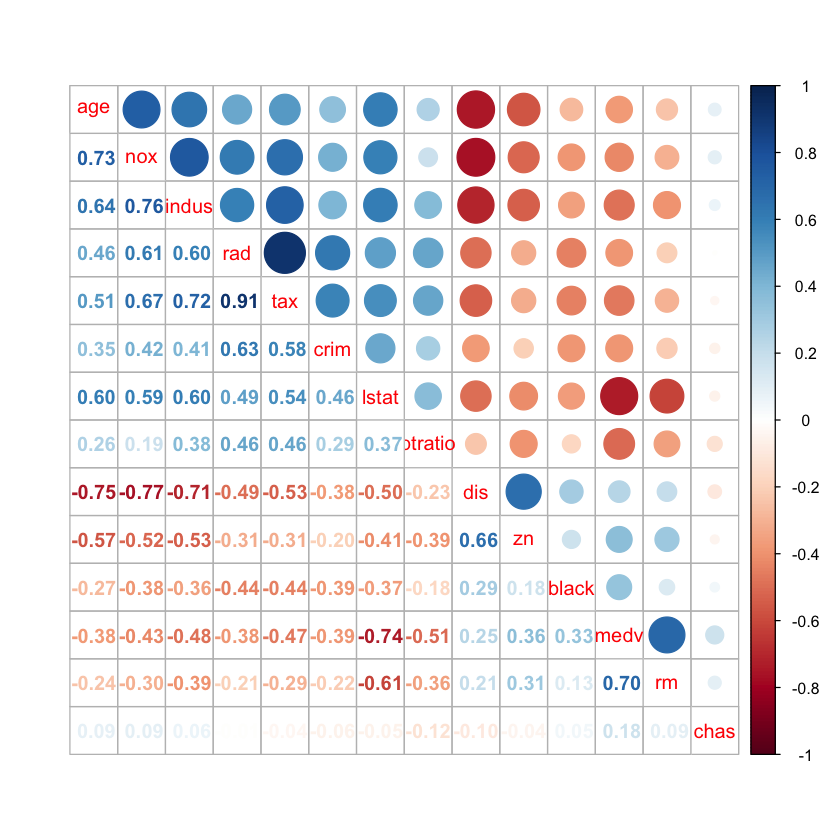

In [341]:
cor_data = cor(Boston)
corrplot.mixed(cor_data, order = 'AOE')

from this correlation matricx it is clear that varibale age,nox,indus,rad,tax,and lstat are more correlated with crim.

In [342]:
Boston$crim = factor(ifelse(Boston$crim<median(Boston$crim),"Low","High"))

we factorised the crim varibale as high and low based on the median. So anything below median is set to low and high otherwise.

In [343]:
summary(Boston$crim)
head(Boston,1)

High  Low 
 253  253

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Low,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24


In [344]:
set.seed(123)
indis <- sample(1:nrow(Boston),  round(2/3*nrow(Boston)), replace = FALSE)
train.data <- Boston[indis,]
test.data <- Boston[-indis,]

y_true_train <- as.numeric(train.data$crim)-1
y_true_test <- as.numeric(test.data$crim)-1

splitting data into train adn test.

### Logistic Regression with 5 variable subset

In [345]:
glm.fit <- glm(crim ~nox+indus+rad+tax+lstat, data = train.data, family = "binomial")
#glm.fit <- glm(crim ~zn+nox+age+rad+ptratio+black+medv, data = train.data, family = "binomial")
summary(glm.fit)


Call:
glm(formula = crim ~ nox + indus + rad + tax + lstat, family = "binomial", 
    data = train.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.52603  -0.01085   0.05006   0.30545   2.00287  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  19.57250    3.18556   6.144 8.04e-10 ***
nox         -35.44264    6.50805  -5.446 5.15e-08 ***
indus         0.03219    0.05341   0.603 0.546715    
rad          -0.51661    0.14568  -3.546 0.000391 ***
tax           0.00751    0.00290   2.590 0.009611 ** 
lstat        -0.05618    0.03626  -1.549 0.121293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 467.04  on 336  degrees of freedom
Residual deviance: 178.94  on 331  degrees of freedom
AIC: 190.94

Number of Fisher Scoring iterations: 8


All of the coeefiecnts are significant or close to being significant.

In [346]:
glm.probs.train <- predict(glm.fit, newdata = train.data, type = "response")
y_hat_train <- round(glm.probs.train)
glm.probs.test <- predict(glm.fit, newdata = test.data, type = "response")
y_hat_test <- round(glm.probs.test)

train_err <- sum(abs(y_hat_train- y_true_train))/length(y_true_train)
test_err <- sum(abs(y_hat_test- y_true_test))/length(y_true_test)

print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))


[1] "Train Acccuracy: 0.872403560830861"
[1] "Test Acccuracy: 0.887573964497041"


Logistic Regression performed good with 88% accuracy having subset of 5 significant varibles.

### Logistic Regression with 6 variable subset

In [347]:
glm.fit <- glm(crim ~age+nox+indus+rad+tax+lstat, data = train.data, family = "binomial")
#glm.fit <- glm(crim ~zn+nox+age+rad+ptratio+black+medv, data = train.data, family = "binomial")
summary(glm.fit)


Call:
glm(formula = crim ~ age + nox + indus + rad + tax + lstat, family = "binomial", 
    data = train.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.66986  -0.01222   0.04462   0.31111   1.91988  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  18.585591   3.261470   5.699 1.21e-08 ***
age          -0.012407   0.010853  -1.143 0.252964    
nox         -32.364504   6.936218  -4.666 3.07e-06 ***
indus         0.027860   0.053402   0.522 0.601871    
rad          -0.511580   0.144910  -3.530 0.000415 ***
tax           0.007762   0.002953   2.629 0.008575 ** 
lstat        -0.039756   0.039847  -0.998 0.318414    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 467.04  on 336  degrees of freedom
Residual deviance: 177.60  on 330  degrees of freedom
AIC: 191.6

Number of Fisher Scoring iterations: 8


In [348]:
glm.probs.train <- predict(glm.fit, newdata = train.data, type = "response")
y_hat_train <- round(glm.probs.train)
glm.probs.test <- predict(glm.fit, newdata = test.data, type = "response")
y_hat_test <- round(glm.probs.test)

train_err <- sum(abs(y_hat_train- y_true_train))/length(y_true_train)
test_err <- sum(abs(y_hat_test- y_true_test))/length(y_true_test)

print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))


[1] "Train Acccuracy: 0.875370919881306"
[1] "Test Acccuracy: 0.905325443786982"


As we can see here that we we added one more significant varible to the new model the accuracy has increased to 90%.

### LDA with 5 variable subset

In [349]:
lda.fit <- lda(crim~nox+indus+rad+tax+lstat, data = train.data)

# make predictions for the training.
train_pred <- predict(lda.fit, newdata = train.data)

# make predictions for the test
test_pred <- predict(lda.fit, newdata = test.data)

In [350]:
# compute the train error rates
train_error <- (1/length(train.data$crim))*length(which(train.data$crim != train_pred$class))


# compute the test error rates
test_error <- (1/length(test.data$crim))*length(which(test.data$crim != test_pred$class))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_error))
print(paste('Test Acccuracy:',1-test_error))


[1] "Train Acccuracy: 0.845697329376855"
[1] "Test Acccuracy: 0.857988165680473"


LDA performed worse thatn the Logistic regression with an accuracy of 85%.

### LDA with 6 variable subset

In [351]:
lda.fit <- lda(crim~age+nox+indus+rad+tax+lstat, data = train.data)

# make predictions for the training.
train_pred <- predict(lda.fit, newdata = train.data)

# make predictions for the test
test_pred <- predict(lda.fit, newdata = test.data)

# compute the train error rates
train_error <- (1/length(train.data$crim))*length(which(train.data$crim != train_pred$class))


# compute the test error rates
test_error <- (1/length(test.data$crim))*length(which(test.data$crim != test_pred$class))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_error))
print(paste('Test Acccuracy:',1-test_error))


[1] "Train Acccuracy: 0.836795252225519"
[1] "Test Acccuracy: 0.840236686390533"


Here surprisingly the model's accuracy got decreased when one significant varible was added.

### QDA with 5 varible subset

In [352]:
qda.fit <- qda(crim~nox+indus+rad+tax+lstat, data = train.data)

In [353]:
# make predictions for the training and test.
train_pred <- predict(qda.fit, newdata = train.data)
test_pred <- predict(qda.fit, newdata = test.data)

In [354]:
# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

In [355]:
# compute train and test error.
train_err <- (1/length(y_hat_train))*length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test))*length(which(y_true_test != y_hat_test))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))


[1] "Train Acccuracy: 0.875370919881306"
[1] "Test Acccuracy: 0.85207100591716"


Voila! here also QDA performed better than the LDA, and much closer to the logistic model. Still the logistic rgression is better among all.

### QDA with 6 varible subset

In [356]:
qda.fit <- qda(crim~age+nox+indus+rad+tax+lstat, data = train.data)

# make predictions for the training and test.
train_pred <- predict(qda.fit, newdata = train.data)
test_pred <- predict(qda.fit, newdata = test.data)

# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

# compute train and test error.
train_err <- (1/length(y_hat_train))*length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test))*length(which(y_true_test != y_hat_test))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))


[1] "Train Acccuracy: 0.875370919881306"
[1] "Test Acccuracy: 0.875739644970414"


QDA haven't performed noticeably with 6 feature.

### kNN with 5 varibale subset.

In [357]:
install.packages("class")
install.packages('ggplot2')
install.packages('gganimate')
library(class)
library(ggplot2)
library(gganimate)


The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//RtmpFBObGM/downloaded_packages


No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



In [358]:
set.seed(122)
k_vals = c(1:20)
sig_variables <- c('nox','indus','rad','tax','lstat')

x_train <- train.data[,sig_variables]
y_train <- train.data$crim
x_test <- test.data[,sig_variables]
y_test <- test.data$crim

In [359]:
''' # error rates for different k values
for (i in 1:20){
                knn_pred_vals <- knn(x_train, x_test, y_train, k=i)
                knn_error_rate <- mean(knn_pred_vals!=y_test)
                print(paste("kNN error rate when K =",k_vals[i],"is",knn_error_rate))
}
'''

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected string constant
6: }
7: '
     ^


In [361]:
# accuracy for different k values
accu_store <- matrix(rep(NA, 20))
for (i in 1:20){
                knn_pred_vals <- knn(x_train, x_test, y_train, k=i)
                knn_error_rate <- mean(knn_pred_vals!=y_test)
                print(paste("kNN Accuracy when K =",k_vals[i],"is",1-knn_error_rate))
                accu_store[i] = 1-knn_error_rate
}


[1] "kNN Accuracy when K = 1 is 0.952662721893491"
[1] "kNN Accuracy when K = 2 is 0.952662721893491"
[1] "kNN Accuracy when K = 3 is 0.964497041420118"
[1] "kNN Accuracy when K = 4 is 0.946745562130177"
[1] "kNN Accuracy when K = 5 is 0.946745562130177"
[1] "kNN Accuracy when K = 6 is 0.923076923076923"
[1] "kNN Accuracy when K = 7 is 0.93491124260355"
[1] "kNN Accuracy when K = 8 is 0.923076923076923"
[1] "kNN Accuracy when K = 9 is 0.93491124260355"
[1] "kNN Accuracy when K = 10 is 0.917159763313609"
[1] "kNN Accuracy when K = 11 is 0.917159763313609"
[1] "kNN Accuracy when K = 12 is 0.917159763313609"
[1] "kNN Accuracy when K = 13 is 0.899408284023669"
[1] "kNN Accuracy when K = 14 is 0.905325443786982"
[1] "kNN Accuracy when K = 15 is 0.899408284023669"
[1] "kNN Accuracy when K = 16 is 0.869822485207101"
[1] "kNN Accuracy when K = 17 is 0.869822485207101"
[1] "kNN Accuracy when K = 18 is 0.875739644970414"
[1] "kNN Accuracy when K = 19 is 0.887573964497041"
[1] "kNN Accuracy when 

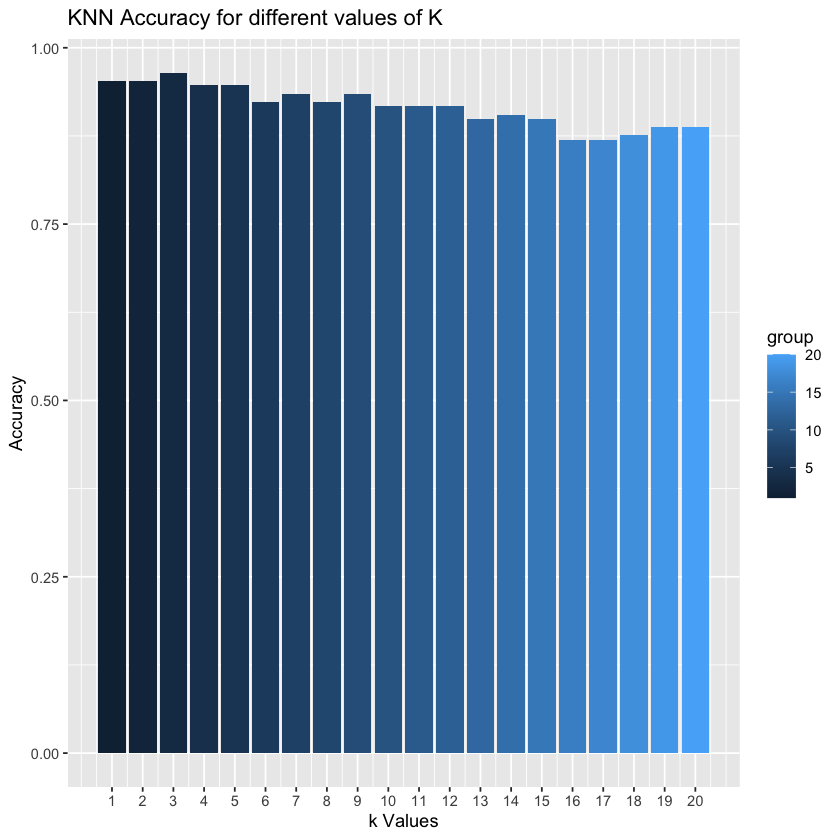

In [362]:
data <- data.frame(group=c(1:20), values=accu_store, frame=rep('a',20))


ggplot(data, aes(x=group, y=values, fill=group,lab='k Values')) + 
  geom_bar(stat='identity')+xlab("k Values") + ggtitle('KNN Accuracy for different values of K')+ylab("Accuracy")+scale_x_continuous(breaks = 1:20)

kNN magic!! the KNN achieves the best accuracy of 96% with K = 3.

### kNN with 6 varibale subset

[1] "kNN Accuracy when K = 1 is 0.917159763313609"
[1] "kNN Accuracy when K = 2 is 0.923076923076923"
[1] "kNN Accuracy when K = 3 is 0.917159763313609"
[1] "kNN Accuracy when K = 4 is 0.917159763313609"
[1] "kNN Accuracy when K = 5 is 0.928994082840237"
[1] "kNN Accuracy when K = 6 is 0.905325443786982"
[1] "kNN Accuracy when K = 7 is 0.905325443786982"
[1] "kNN Accuracy when K = 8 is 0.911242603550296"
[1] "kNN Accuracy when K = 9 is 0.905325443786982"
[1] "kNN Accuracy when K = 10 is 0.899408284023669"
[1] "kNN Accuracy when K = 11 is 0.893491124260355"
[1] "kNN Accuracy when K = 12 is 0.887573964497041"
[1] "kNN Accuracy when K = 13 is 0.881656804733728"
[1] "kNN Accuracy when K = 14 is 0.875739644970414"
[1] "kNN Accuracy when K = 15 is 0.857988165680473"
[1] "kNN Accuracy when K = 16 is 0.863905325443787"
[1] "kNN Accuracy when K = 17 is 0.857988165680473"
[1] "kNN Accuracy when K = 18 is 0.857988165680473"
[1] "kNN Accuracy when K = 19 is 0.857988165680473"
[1] "kNN Accuracy whe

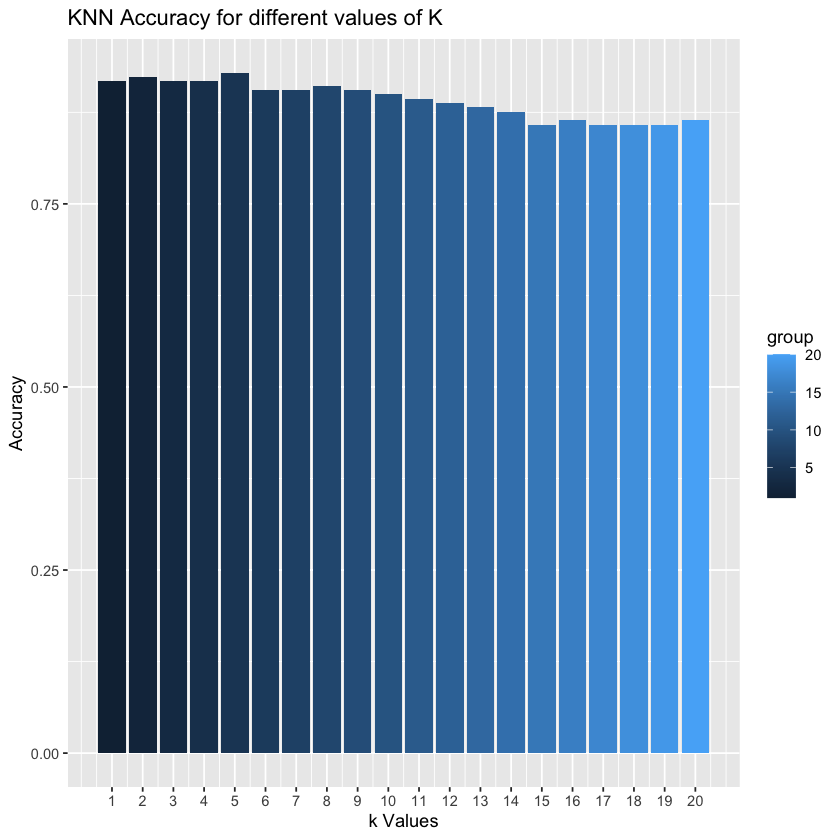

In [363]:
set.seed(368)
sig_variables <- c('age','nox','indus','rad','tax','lstat')
x_train <- train.data[,sig_variables]
y_train <- train.data$crim
x_test <- test.data[,sig_variables]
y_test <- test.data$crim

accu_store <- matrix(rep(NA, 20))
for (i in 1:20){
                knn_pred_vals <- knn(x_train, x_test, y_train, k=i)
                knn_error_rate <- mean(knn_pred_vals!=y_test)
                print(paste("kNN Accuracy when K =",k_vals[i],"is",1-knn_error_rate))
                accu_store[i] = 1-knn_error_rate
}

data <- data.frame(group=c(1:20), values=accu_store, frame=rep('a',20))


ggplot(data, aes(x=group, y=values, fill=group,lab='k Values')) + 
  geom_bar(stat='identity')+xlab("k Values") + ggtitle('KNN Accuracy for different values of K')+ylab("Accuracy")+scale_x_continuous(breaks = 1:20)

for this subset KNN achieves the best accuracy of 93% with K = 5 which is also our subset size.It is clear that the best model for this particular dataset at this time is a kNN model with 5 feature subset.

### (b) *Fit classification models in order to predict whether a given census tract has a high, medium or low crime rates. Explore logistic regression, LDA, QDA, and KNN models using various subsets of the predictors. Describe your findings.*


we will do the above same predictoin for new dataset with 3 types crim rates.

In [365]:
data(Boston)
class(Boston$crim)
summary(Boston$crim)

sd(Boston$crim)
mean(Boston$crim)

#Boston$crim[Boston$crim<sd(Boston$crim)- mean(Boston$crim)]="Low"
#Boston$crim[Boston$crim>sd(Boston$crim)+ mean(Boston$crim)]="High"


Boston$crim =cut(Boston$crim, breaks = c(-Inf,sd(mean(Boston$crim) - Boston$crim),mean(Boston$crim) + sd(Boston$crim) ,Inf), labels = c("Low","Medium","High"))


[1] "numeric"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

[1] 8.601545

[1] 3.613524

using  cut() function to categorize numerical data based on mean and sd of data.


In [366]:
set.seed(4455)
indis <- sample(1:nrow(Boston),  round(2/3*nrow(Boston)), replace = FALSE)
train.data <- Boston[indis,]
test.data <- Boston[-indis,]

y_true_train <- as.numeric(train.data$crim)-1
y_true_test <- as.numeric(test.data$crim)-1

splitting train and test data.

### Logistic Regression with 5 varibales

In [367]:
glm.fit <- glm(crim ~nox+indus+rad+tax+lstat, data = train.data, family = "binomial")
#glm.fit <- glm(crim ~zn+nox+age+rad+ptratio+black+medv, data = train.data, family = "binomial")

glm.probs.train <- predict(glm.fit, newdata = train.data, type = "response")
y_hat_train <- round(glm.probs.train)
glm.probs.test <- predict(glm.fit, newdata = test.data, type = "response")
y_hat_test <- round(glm.probs.test)

train_err <- sum(abs(y_hat_train- y_true_train))/length(y_true_train)
test_err <- sum(abs(y_hat_test- y_true_test))/length(y_true_test)

print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))







[1] "Train Acccuracy: 0.830860534124629"
[1] "Test Acccuracy: 0.875739644970414"


### Logistic Regression with 6 varibales

In [368]:
glm.fit <- glm(crim ~age+nox+indus+rad+tax+lstat, data = train.data, family = "binomial")
#glm.fit <- glm(crim ~zn+nox+age+rad+ptratio+black+medv, data = train.data, family = "binomial")

glm.probs.train <- predict(glm.fit, newdata = train.data, type = "response")
y_hat_train <- round(glm.probs.train)
glm.probs.test <- predict(glm.fit, newdata = test.data, type = "response")
y_hat_test <- round(glm.probs.test)

train_err <- sum(abs(y_hat_train- y_true_train))/length(y_true_train)
test_err <- sum(abs(y_hat_test- y_true_test))/length(y_true_test)

print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "Train Acccuracy: 0.830860534124629"
[1] "Test Acccuracy: 0.869822485207101"


the model accuracy increased with the number of varibles.

### LDA with 5 varibales

In [369]:
lda.fit <- lda(crim~nox+indus+rad+tax+lstat, data = train.data)

# make predictions for the training.
train_pred <- predict(lda.fit, newdata = train.data)

# make predictions for the test
test_pred <- predict(lda.fit, newdata = test.data)

# compute the train error rates
train_error <- (1/length(train.data$crim))*length(which(train.data$crim != train_pred$class))


# compute the test error rates
test_error <- (1/length(test.data$crim))*length(which(test.data$crim != test_pred$class))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_error))
print(paste('Test Acccuracy:',1-test_error))


[1] "Train Acccuracy: 0.86053412462908"
[1] "Test Acccuracy: 0.857988165680473"


### LDA with 6 Variables

In [374]:
lda.fit <- lda(crim~age+nox+indus+rad+tax+lstat, data = train.data)

# make predictions for the training.
train_pred <- predict(lda.fit, newdata = train.data)

# make predictions for the test
test_pred <- predict(lda.fit, newdata = test.data)

# compute the train error rates
train_error <- (1/length(train.data$crim))*length(which(train.data$crim != train_pred$class))


# compute the test error rates
test_error <- (1/length(test.data$crim))*length(which(test.data$crim != test_pred$class))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_error))
print(paste('Test Acccuracy:',1-test_error))


[1] "Train Acccuracy: 0.863501483679525"
[1] "Test Acccuracy: 0.857988165680473"


Amazingly LDA perform the same accuarcy fot both different subsets.

### QDA with 5 Variables

In [375]:
qda.fit <- qda(crim~age+nox+indus+lstat+rad, data = train.data)

# make predictions for the training and test.
train_pred <- predict(qda.fit, newdata = train.data)
test_pred <- predict(qda.fit, newdata = test.data)

# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

# compute train and test error.
train_err <- (1/length(y_hat_train))*length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test))*length(which(y_true_test != y_hat_test))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))


ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group Medium


These data cannot be used to train this classifier. The issue is that the training set is rank insufficient for at least one class. The estimates in Medium cannot be obtained by inverting one or more covariance matrices because some variables are collinear. We select the most correlated variables for the forecasts, for this reason.

### QDA with 6 Variables

In [376]:
qda.fit <- qda(crim~., data = train.data)

# make predictions for the training and test.
train_pred <- predict(qda.fit, newdata = train.data)
test_pred <- predict(qda.fit, newdata = test.data)

# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

# defining the dependent varible.
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

y_true_train <- train.data$crim
y_true_test <- test.data$crim

# compute train and test error.
train_err <- (1/length(y_hat_train))*length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test))*length(which(y_true_test != y_hat_test))

# compute Accuracy
print(paste('Train Acccuracy:',1-train_err))
print(paste('Test Acccuracy:',1-test_err))


ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group Medium


In [377]:
summary(train.data$crim)

Low Medium   High 
   286     18     33

### kNN with 5 variables

[1] "kNN Accuracy when K = 1 is 0.85207100591716"
[1] "kNN Accuracy when K = 2 is 0.863905325443787"
[1] "kNN Accuracy when K = 3 is 0.846153846153846"
[1] "kNN Accuracy when K = 4 is 0.875739644970414"
[1] "kNN Accuracy when K = 5 is 0.881656804733728"
[1] "kNN Accuracy when K = 6 is 0.887573964497041"
[1] "kNN Accuracy when K = 7 is 0.893491124260355"
[1] "kNN Accuracy when K = 8 is 0.893491124260355"
[1] "kNN Accuracy when K = 9 is 0.887573964497041"
[1] "kNN Accuracy when K = 10 is 0.881656804733728"
[1] "kNN Accuracy when K = 11 is 0.887573964497041"
[1] "kNN Accuracy when K = 12 is 0.881656804733728"
[1] "kNN Accuracy when K = 13 is 0.887573964497041"
[1] "kNN Accuracy when K = 14 is 0.887573964497041"
[1] "kNN Accuracy when K = 15 is 0.887573964497041"
[1] "kNN Accuracy when K = 16 is 0.887573964497041"
[1] "kNN Accuracy when K = 17 is 0.887573964497041"
[1] "kNN Accuracy when K = 18 is 0.887573964497041"
[1] "kNN Accuracy when K = 19 is 0.887573964497041"
[1] "kNN Accuracy when

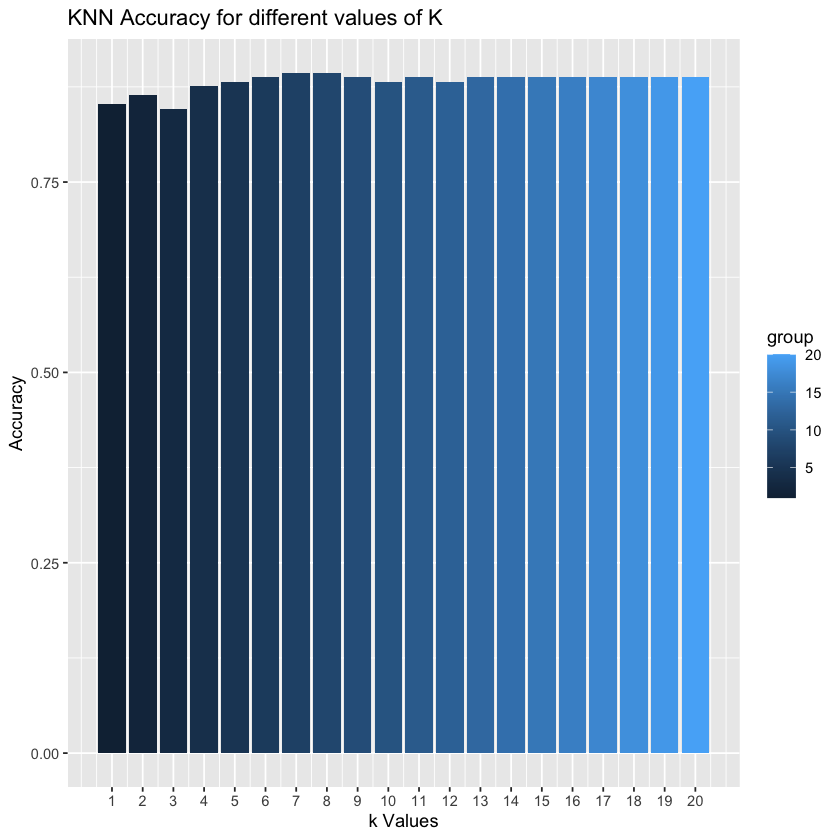

In [378]:
set.seed(122)
k_vals = c(1:20)
sig_variables <- c('nox','indus','rad','tax','lstat')

x_train <- train.data[,sig_variables]
y_train <- train.data$crim
x_test <- test.data[,sig_variables]
y_test <- test.data$crim

accu_store <- matrix(rep(NA, 20))
for (i in 1:20){
                knn_pred_vals <- knn(x_train, x_test, y_train, k=i)
                knn_error_rate <- mean(knn_pred_vals!=y_test)
                print(paste("kNN Accuracy when K =",k_vals[i],"is",1-knn_error_rate))
                accu_store[i] = 1-knn_error_rate
}

data <- data.frame(group=c(1:20), values=accu_store, frame=rep('a',20))


ggplot(data, aes(x=group, y=values, fill=group,lab='k Values')) + 
  geom_bar(stat='identity')+xlab("k Values") + ggtitle('KNN Accuracy for different values of K')+ylab("Accuracy")+scale_x_continuous(breaks = 1:20)

### kNN with 6 varibales

[1] "kNN Accuracy when K = 1 is 0.869822485207101"
[1] "kNN Accuracy when K = 2 is 0.869822485207101"
[1] "kNN Accuracy when K = 3 is 0.905325443786982"
[1] "kNN Accuracy when K = 4 is 0.875739644970414"
[1] "kNN Accuracy when K = 5 is 0.869822485207101"
[1] "kNN Accuracy when K = 6 is 0.881656804733728"
[1] "kNN Accuracy when K = 7 is 0.887573964497041"
[1] "kNN Accuracy when K = 8 is 0.887573964497041"
[1] "kNN Accuracy when K = 9 is 0.893491124260355"
[1] "kNN Accuracy when K = 10 is 0.905325443786982"
[1] "kNN Accuracy when K = 11 is 0.899408284023669"
[1] "kNN Accuracy when K = 12 is 0.911242603550296"
[1] "kNN Accuracy when K = 13 is 0.893491124260355"
[1] "kNN Accuracy when K = 14 is 0.893491124260355"
[1] "kNN Accuracy when K = 15 is 0.887573964497041"
[1] "kNN Accuracy when K = 16 is 0.911242603550296"
[1] "kNN Accuracy when K = 17 is 0.911242603550296"
[1] "kNN Accuracy when K = 18 is 0.899408284023669"
[1] "kNN Accuracy when K = 19 is 0.905325443786982"
[1] "kNN Accuracy whe

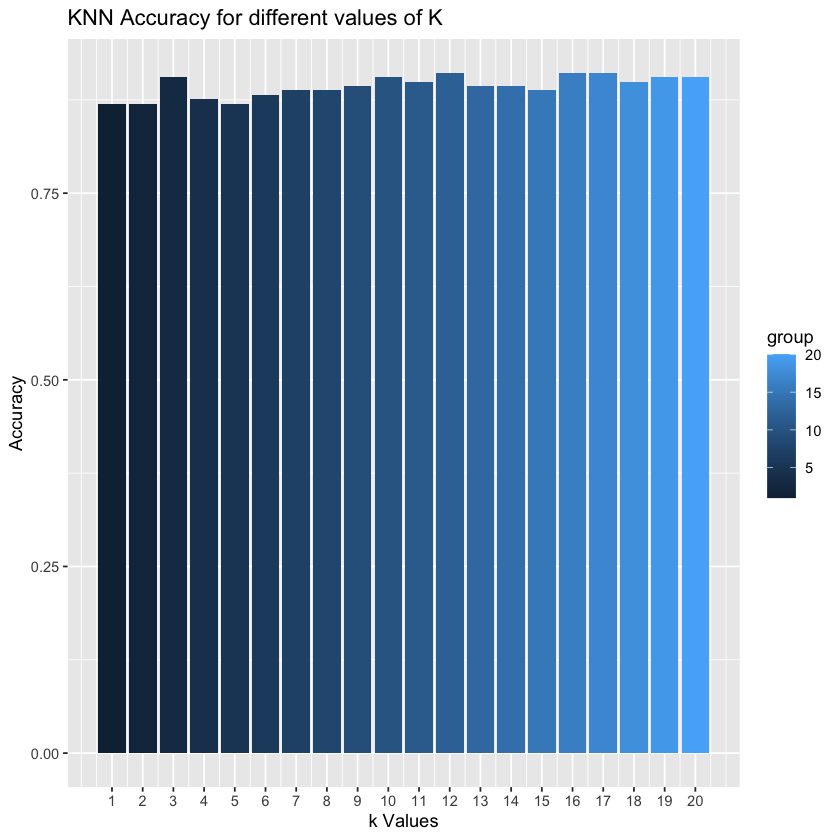

In [379]:
set.seed(12)
k_vals = c(1:20)
sig_variables <- c('age','nox','indus','rad','tax','lstat')

x_train <- train.data[,sig_variables]
y_train <- train.data$crim
x_test <- test.data[,sig_variables]
y_test <- test.data$crim

accu_store <- matrix(rep(NA, 20))
for (i in 1:20){
                knn_pred_vals <- knn(x_train, x_test, y_train, k=i)
                knn_error_rate <- mean(knn_pred_vals!=y_test)
                print(paste("kNN Accuracy when K =",k_vals[i],"is",1-knn_error_rate))
                accu_store[i] = 1-knn_error_rate
}

data <- data.frame(group=c(1:20), values=accu_store, frame=rep('a',20))


ggplot(data, aes(x=group, y=values, fill=group,lab='k Values')) + 
  geom_bar(stat='identity')+xlab("k Values") + ggtitle('KNN Accuracy for different values of K')+ylab("Accuracy")+scale_x_continuous(breaks = 1:20)

kNN performed well with 6 variables when k=3. We can see that the accuracy has been increased as one more classifier has been introduced. So with three target classes kNN performed best with 6 varibles with an acuurcay of 90% which followed by LR 87% which not much difference.

### (c) *Reflect on the results from (a) and (b). Is this within your expectation, why or why not?*

We can see that when the number of classes in the target variable increased the acurrracy decreased, but not that much. But 90% accuracy for 3 target classes is more better than 93% for the 2 target class. Also the the data was also unbalanced for the 'Medium' and 'High' targets.Replicating the data helps to lower noise, but it has little effect on improving numerical rank. So let's say you just have two data points. A distinct quadratic model cannot be estimated from the points. Even if you reproduce each point a million times, you will still only be able to fit a straight line through what are still essentially just a pair of points. Replication essentially does not increase the content of information. It only reduces noise in areas where you already have information.